Generating the data and the X_train and y_train !

In [11]:
import numpy as np
import matplotlib.pyplot as plt
SEED = 0
np.random.seed(SEED)
CLASS_1 = np.random.multivariate_normal([5, 1], [[3,0], [0,1]], size=200) #generate for us (x1,x2) for class 2 
CLASS_2 = np.random.multivariate_normal([3, 4], [[1, 0], [0, 1]], size=200) #generate for us (x1, x2) for class 2
CLASS_3 = np.random.multivariate_normal([10, 1], [[0.4, 0], [0, 2]], size=200) #generate for us (x1, x2)  for class 3
y_train = np.concatenate((np.ones(200), 2*np.ones(200), 3*np.ones(200)), axis=0)
X_train_qda  = np.concatenate((CLASS_1, CLASS_2, CLASS_3), axis=0)

Fitting the QDA model ( right hand side of the plot !)

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True) # to be able to see the covariance estimate for each class !!!
qda.fit(X_train_qda, y_train)
estimated_covariances_qda = np.array(qda.covariance_)  # estimated covariance matrix of each class 
estimated_means_qda = np.array(qda.means_)  # estimated mean vector(size 2 in this case) for each class, so it is a 3 x 2 matrix 

Fitting the LDA Model !

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
X_1 = X_train_qda.T[0]
X_2 = X_train_qda.T[1]
X_1_squared = X_1**2
X_2_squared = X_2**2
X_1_X_2 = X_1*X_2

#Reshaping just to be able to use np.concatenate on the axis 1  ( since X_1 if of dim 600, we need to change it to 600,1 in numpy they are different !!)
X_1 = X_1.reshape(-1, 1)
X_2 = X_2.reshape(-1, 1)
X_1_squared = X_1_squared.reshape(-1, 1)
X_2_squared = X_2_squared.reshape(-1, 1)
X_1_X_2 = X_1_X_2.reshape(-1, 1)
#Constructing the X_train_lda
X_train_lda = np.concatenate((X_1, X_2,X_1_squared,X_2_squared, X_1_X_2), axis=1)
#keep in mind the the y_train_lda is the same as y_train_qda which I will call y_train

lda = LinearDiscriminantAnalysis(solver = "svd",store_covariance=True) # to be able to see the covariance estimate for each class !!!
lda.fit(X_train_lda, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

Plotting figure 4.6 

[]

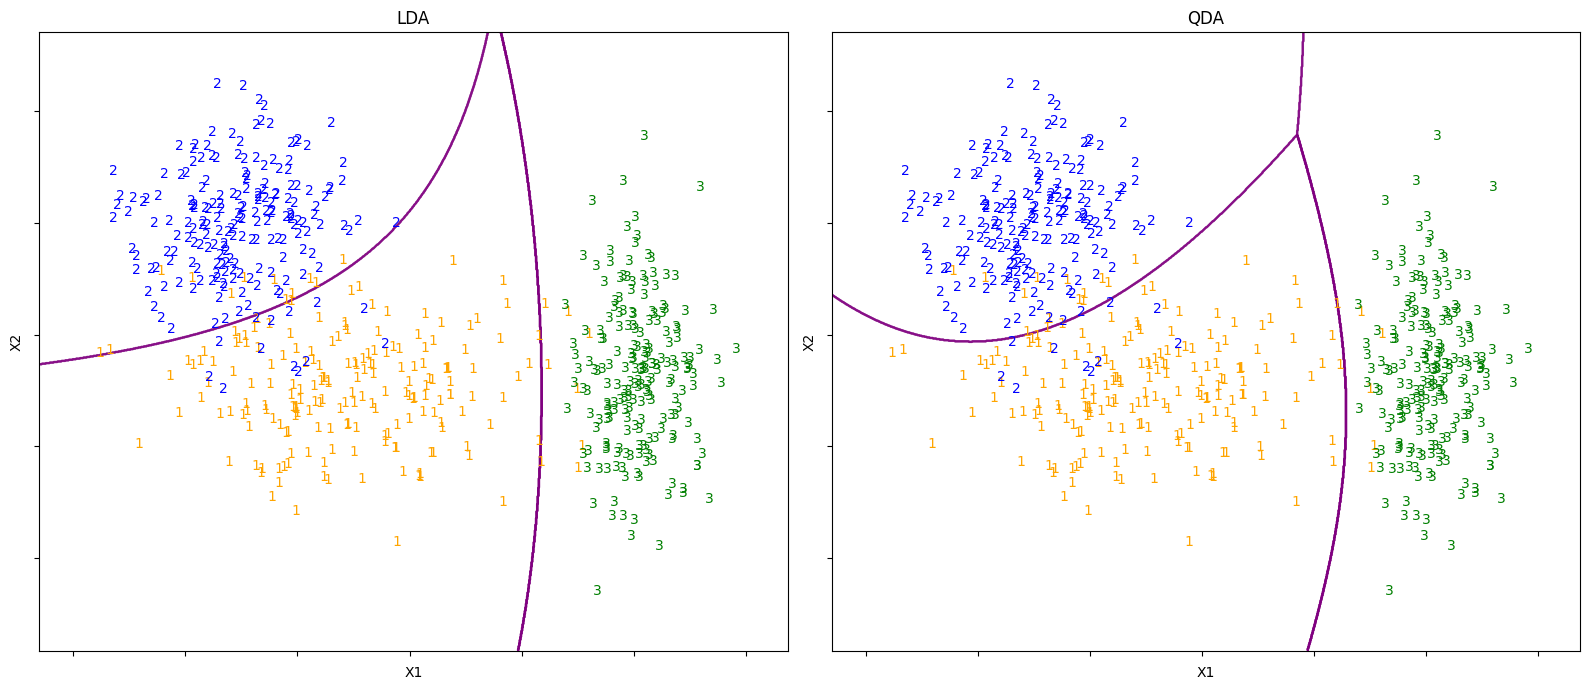

In [16]:

fig, axs = plt.subplots(1, 2, figsize=(16, 7))

''' Right Hand Side (QDA) '''
#The Decision Boundary
x_min, x_max = X_train_qda[:, 0].min() - 1, X_train_qda[:, 0].max() + 1 # by x we mean x1 
y_min, y_max = X_train_qda[:, 1].min() - 1, X_train_qda[:, 1].max() + 1 # by y we mean x2
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01)) # as we did in homework 1 !

# notice that np.c_ is very similar to np.concatenate but the good use of np.c_ is that it automatically converts an array say shape 600, to shape 600,1 when concatenating, where as in np.concatenate we need to do that ourselves before concatenating along the axis = 1!
# So notice we can pass xx.ravel() and yy.ravel() to the np.c_ method and it will automatically convert them to N,1 shape and then it will concatenate them column wise !!!

Z = qda.predict(np.c_[xx1.ravel(), xx2.ravel()])
# to be able to use the Z in the contour method it should be reshaped to the same shape as xx1 and xx2 !
Z = Z.reshape(xx1.shape)

axs[1].contour(xx1, xx2, Z, colors='purple', alpha=0.5) # as we did in homework 1 !

#The Generated Points 
colors = ['orange', 'blue', 'green'] 
number = ['1', '2', '3']
for i in range(1,4):
    for j in range(len(y_train)):
        if y_train[j] == i:
            axs[1].text(X_train_qda[j, 0], X_train_qda[j, 1], c=colors[i-1], s=number[i-1])
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')
axs[1].set_yticklabels([]) # to mimic the picture ( to remove the values on the y-axis)
axs[1].set_xticklabels([]) # to mimic the picture ( to remove the values on the x-axis)
axs[1].set_title('QDA')

''' Left Hand Side (LDA) '''

#The Decision Boundary
x1_min, x1_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1 # x1 will be on the x-axis
x2_min, x2_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1 # x2 will be on the y-axis
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01)) # as we did in homework 1!
# now from these x1 x2 we need to calculate the last 3 dimensions that the lda model is expecting !
xx1_2 = x1**2
xx2_2 = x2**2
x1x2 = x1*x2
#NotICE ORDER MATTER HERE so we need to pass first X_1 then X_2 then X_1_squared then X_2_squared then X_1_X_2 !!!
Z = lda.predict(np.c_[x1.ravel(), x2.ravel(),xx1_2.ravel(),xx2_2.ravel(),x1x2.ravel()])
Z = Z.reshape(x1.shape)
axs[0].contour(x1, x2, Z, colors='purple', alpha=0.5) # as we did in homework 1 !

#The Generated Points 
colors = ['orange', 'blue', 'green'] 
number = ['1', '2', '3']
for i in range(1,4):
    for j in range(len(y_train)):
        if y_train[j] == i:
            axs[0].text(X_train_lda[j, 0], X_train_lda[j, 1], c=colors[i-1], s=number[i-1])
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')
axs[0].set_yticklabels([]) # to mimic the picture ( to remove the values on the y-axis)
axs[0].set_xticklabels([]) # to mimic the picture ( to remove the values on the x-axis)
axs[0].set_title('LDA')
plt.tight_layout()
plt.plot()